# Introduction to NumPy
NumPy Notes:

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.__version__

AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'

## Differences between lists and NumPy arrays
* Lists - add/delete items, mutable size, different data types
* Arrays - immutable size, same data type, contiguous

In [ ]:
gpas_as_list = [3.4, 3.2, 3.6]

In [ ]:
# Can add elements to it
gpas_as_list.append(4.0)
# Can have multiple data types
gpas_as_list.insert(1, "Whatevs")
# Can have items removed
gpas_as_list.pop(1)

In [ ]:
gpas_as_list

In [ ]:
gpas = np.array(gpas_as_list)

In [ ]:
?gpas

In [ ]:
gpas.dtype

In [ ]:
gpas.itemsize

In [ ]:
gpas.size

In [ ]:
len(gpas)

In [ ]:
gpas.nbytes

## Multidimensional arrays
* Keep in mind [floating point precision](https://numpy.org/doc/stable/user/basics.types.html#extended-precision) if adding floats from array
* Data structure is called `ndarray`, representing any **n**umber of **d**imensions
* Arrays can have multiple dimensions, you declare them on creation
* Dimensions help define what each element in the array represents.  A two dimensional array is just an array of arrays
* **Rank** defines how many dimensions an array contains 
* **Shape** defines the length of each of the array's dimensions
* Each dimension is also referred to as an **axis**, and they are zero-indexed. Multiples are called **axes**
* A 2d array is AKA **matrix**

In [ ]:
student_gpas = np.array([
    [3.4, 3.2, 3.6, 4.0],
    [3.2, 3.8, 4.0, 4.0],
    [1.2, 2.4, 3.5, 3.8]
], np.float16)
student_gpas

In [ ]:
student_gpas.ndim

In [ ]:
student_gpas.shape

In [ ]:
student_gpas.size

In [ ]:
len(student_gpas)

In [ ]:
student_gpas.itemsize

In [ ]:
student_gpas.itemsize * student_gpas.size

In [ ]:
%whos ndarray

In [ ]:
np.info(student_gpas)

In [ ]:
student_gpas[2]

In [ ]:
student_gpas[2][3]

In [ ]:
student_gpas

In [ ]:
student_gpas.mean()

In [ ]:
student_gpas.mean(axis=1)

In [ ]:
plt.boxplot(student_gpas.T)
plt.plot()

## About data types
* [data types](https://docs.scipy.org/doc/numpy-1.14.0/user/basics.types.html) are here
* Data types are maintained by wrapping values in a [scalar representation](https://numpy.org/doc/stable/reference/arrays.scalars.html)
* np.zeros is a good way to create an array of zeros and specify data type

In [50]:
study_minutes = np.zeros(7, np.uint16)
study_minutes

array([0, 0, 0, 0, 0, 0, 0], dtype=uint16)

In [51]:
%whos

Variable        Type       Data/Info
------------------------------------
a               ndarray    5: 5 elems, type `int64`, 40 bytes
b               ndarray    5: 5 elems, type `int64`, 40 bytes
gpas            ndarray    4: 4 elems, type `float64`, 32 bytes
gpas_as_list    list       n=4
np              module     Shape: <function shape at 0x000001F1C0D9AFC0>
plt             module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
student_gpas    ndarray    3x4: 12 elems, type `float16`, 24 bytes
study_minutes   ndarray    7: 7 elems, type `uint16`, 14 bytes
x1              ndarray    3x3: 9 elems, type `float64`, 72 bytes
x2              ndarray    3: 3 elems, type `float64`, 24 bytes


In [52]:
study_minutes[0] = 150

In [53]:
first_day_minutes = study_minutes[0]

In [54]:
first_day_minutes

np.uint16(150)

In [55]:
type(first_day_minutes)

numpy.uint16

In [56]:
study_minutes[1] = 60

In [57]:
second_day_minutes = study_minutes[1]

In [58]:
second_day_minutes

np.uint16(60)

In [59]:
study_minutes[2:6] = [80, 60, 30, 90]

## Creation 
* `np.random` package.  
  * `RandomState` lets you seed randomness in a repeatable way
* You can append:
   * Use the `np.append` method.  Make sure the new row is the same shape
   * Create/reassign a new array by including the existing array as part of the iterable in creation (enclose in hard brackets)

## Indexing
* Use indexing shortcut by separating dimensions with a comma
* Index using a `list` or `np.array`.  Values will be pulled out at that specific index (Fancy indexing)

In [60]:
study_minutes = np.array([
    study_minutes,
    np.zeros(7, np.uint16)
])

In [61]:
study_minutes.shape

(2, 7)

In [62]:
study_minutes[1][0] = 60

In [63]:
rand = np.random.RandomState(42)
fake_log = rand.randint(30, 180, size=7, dtype=np.uint16)
fake_log

array([132, 122, 128,  44, 136, 129, 101], dtype=uint16)

In [64]:
[fake_log[3], fake_log[4]]

[np.uint16(44), np.uint16(136)]

In [65]:
fake_log[[3, 4]]

array([ 44, 136], dtype=uint16)

In [66]:
index = np.array([
    [3, 4],
    [0, 1]
])
fake_log[index]

array([[ 44, 136],
       [132, 122]], dtype=uint16)

In [67]:
study_minutes = np.append(study_minutes, [fake_log], axis=0)
study_minutes

array([[150,  60,  80,  60,  30,  90,   0],
       [ 60,   0,   0,   0,   0,   0,   0],
       [132, 122, 128,  44, 136, 129, 101]], dtype=uint16)

In [68]:
study_minutes[1, 1] = 360

## Boolean Array Indexing
* Create a boolean array by using comparison operators on an array
  * Use boolean arrays for fancy indexing
  * Boolean arrays can be compared by using bitwise operators (`&`, `|`)
      * Do not use the `and` keyword (will result in error)
      * Order of operations is important when combining comparisons
* Boolean indexing returns a new array, but the existing array can be updated using a boolean index

In [69]:
fake_log[fake_log < 60] 

array([44], dtype=uint16)

In [70]:
study_minutes[study_minutes < 60]

array([30,  0,  0,  0,  0,  0,  0, 44], dtype=uint16)

In [71]:
# Output is True if both values in same index spot in different arrays is the same
np.array([False, True, True]) & np.array([True, False, True])

array([False, False,  True])

In [72]:
# Parenthesis for order of operations
study_minutes[(study_minutes < 60) & (study_minutes > 0)]

array([30, 44], dtype=uint16)

In [73]:
study_minutes[study_minutes < 60] = 0
study_minutes

array([[150,  60,  80,  60,   0,  90,   0],
       [ 60, 360,   0,   0,   0,   0,   0],
       [132, 122, 128,   0, 136, 129, 101]], dtype=uint16)

## Common Routines
* Common [mathematical](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.math.html) [routines](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.html) are abstracted.
    * [`mean`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html#numpy.mean) is a [statistics](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.statistics.html) routine used to calculate the average.
* Reduction functions take a dimension and collapse it into a single value.
    * These functions define an axis parameter, remember that the function works across the dimension.

In [74]:
np.add.reduce(study_minutes[0])

np.uint64(440)

In [75]:
np.add.accumulate(study_minutes[0])

array([150, 210, 290, 350, 350, 440, 440], dtype=uint64)

In [76]:
np.sum(study_minutes[0])

np.uint64(440)

In [77]:
np.sum(study_minutes, axis=1)

array([440, 420, 748], dtype=uint64)

[]

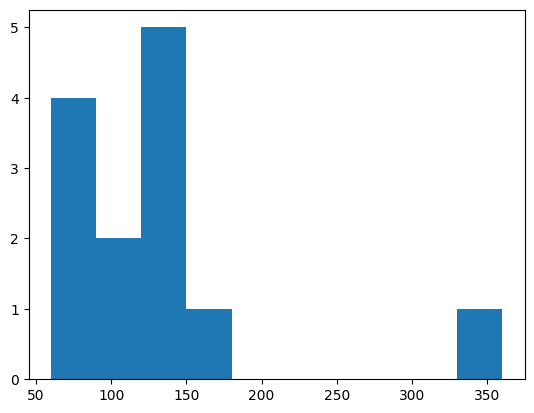

In [78]:
plt.hist(study_minutes[study_minutes > 0])
plt.plot()

## Slicing
* Similar to normal list slicing
* Use commas to separate each dimension slice
* Always returns a data view (assuming your slicing an ndarray)
* Base object can be accessed using the `ndarray.base` property

In [ ]:
fruit = ['apple', 'banana', 'cherry', 'blueberry']

In [ ]:
# Slicing is exclusive ("up to but not including")
fruit[1:3]

In [ ]:
fruit[:3]

In [ ]:
fruit[3:]

In [ ]:
# Slicing a list returns a copy
copied = fruit[:]

In [ ]:
copied[3] = 'cheese'
copied, fruit

In [ ]:
fruit[::2]

In [ ]:
fruit[::-1]

In [ ]:
# Operates similar to range but sets range value within an array
np.arange(20)

In [ ]:
practice = np.arange(42)
practice.shape = (7, 6)
practice

In [ ]:
practice[2:5, 3::2]

In [ ]:
# Any slicing of ndarray return a view, not copy
not_copied = practice[:]
not_copied[0, 0] = 90210
practice, not_copied

In [ ]:
practice.base is None

In [ ]:
not_copied.base is None

In [ ]:
not_copied.base is practice

In [ ]:
practice.flags['OWNDATA'], not_copied.flags['OWNDATA']

## Array Manipulation
* Documentation on manipulation is [here](https://numpy.org/doc/stable/reference/routines.array-manipulation.html)
* `Unravel` is good for a flattened array view
* `Flattened` is good for a copy of the array that is also flattened
* `Reshape` creates a view with a new shape

In [ ]:
practice_view = practice.reshape(3, 14)
practice, practice_view, practice_view.base is practice

In [ ]:
practice.reshape(-1, 2).shape

In [ ]:
practice.ravel()

In [ ]:
np.ravel?

## Linear Algebra
* NumPy module for linear algebra, [linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)
* Solve for a system of equations using the [solve function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve)
    * It's possible to create a square 2 dimensional matrix and a constant row vector and solve for each variable column
    * Double check the answer using the inner product or [dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot).
* Use the `@` to produce the dot product of two arrays.

In [ ]:
# columns: tacos, burritos, horchatas, cokes
orders = np.array([
    [2, 0, 0, 0],
    [4, 1, 2, 2],
    [0, 1, 0, 1],
    [6, 0, 1, 2]
])
totals = np.array([3, 20.50, 10, 14.25])
prices = np.linalg.solve(orders, totals)
prices

In [ ]:
# A * B
orders @ prices

In [ ]:
orders.dot(prices)

## Universal Functions
* [ufuncs](https://docs.scipy.org/doc/numpy/reference/ufuncs.html) are commonly needed vectorized functions
  * Vectorized functions allow users to operate element by element without using a loop
* The standard math and comparison operations have all been overloaded so that they can make use of vectorization
* Values can be [broadcasted](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html), or stretched to be applied to the ufuncs

In [39]:
a, b = np.split(np.arange(1, 11), 2)
a, b

(array([1, 2, 3, 4, 5]), array([ 6,  7,  8,  9, 10]))

In [40]:
a + b

array([ 7,  9, 11, 13, 15])

In [41]:
b - a

array([5, 5, 5, 5, 5])

In [42]:
# This is called broadcasting where 2 is broadcasted across the array (a)
a + np. repeat(2, 5)

array([3, 4, 5, 6, 7])

In [43]:
np.add(1.0, 4.0)

np.float64(5.0)

In [44]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(3.0)
x1, x2

(array([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]]),
 array([0., 1., 2.]))

In [45]:
np.add(x1, x2)

array([[ 0.,  2.,  4.],
       [ 3.,  5.,  7.],
       [ 6.,  8., 10.]])